<a href="https://colab.research.google.com/github/Paultimi20/PaulTimi-Portfolio/blob/main/AirBnB_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/MyDrive/My Jobs/Ufuoma')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import plotly.express as px

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv("airbnb_sample.csv")
df.head(2)

,Listing ID,Last Scraped,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighborhood,Host Listings Count,Host Total Listings Count,Street,Neighborhood,Neighborhood Cleansed,Neighborhood Group Cleansed,City,State,Zipcode,Market,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per month,Geolocation,Sentiment
0,4917301,5/2/17,24035721,Michael,11/22/14,"Los Angeles, California, United States",NaN,NaN,NaN,Woodland Hills/Warner Center,1.0,1.0,"Woodland Hills/Warner Center, Los Angeles, CA ...",Woodland Hills/Warner Center,Woodland Hills,NaN,Los Angeles,CA,91364,Los Angeles,United States,34.147756,-118.591338,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Air conditioning,Free par...",NaN,150.0,NaN,NaN,NaN,NaN,1,0,1,1125,29 months ago,NaN,30,60,90,365,5/2/17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"34.1477564923,-118.591337801",NaN
1,8384432,5/3/17,506809,Ky,4/13/11,"Los Angeles, California, United States",within a few hours,100.0,NaN,Woodland Hills/Warner Center,2.0,2.0,"Woodland Hills/Warner Center, Woodland Hills, ...",Woodland Hills/Warner Center,Woodland Hills,NaN,Woodland Hills,CA,91364,Los Angeles,United States,34.148594,-118.596684,Other,Entire home/apt,2.0,1.5,1.0,1.0,Real Bed,"TV,Cable TV,Wireless Internet,Air conditioning...",NaN,175.0,NaN,NaN,500.0,100.0,1,0,2,5,2 weeks ago,NaN,12,42,72,72,5/3/17,2,5/3/16,9/20/16,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,2.0,0.16,"34.1485944277,-118.596683716",2.0


In [ ]:
#df.info()

In [ ]:
df["State"] = df["State"].replace("ny", "NY")
df["State"] = df["State"].replace(["ca", "Ca"], "CA")
df["State"] = df["State"].replace(["Il"], "IL")
df["State"].unique()

array(['CA', 'TN', 'LA', 'TX', 'MA', 'IL', 'CO', 'NY', 'OR', 'DC', 'WA',
       'MD'], dtype=object)

In [ ]:
df = df[~df["Review Scores Location"].isnull()]
df.head()

,Listing ID,Last Scraped,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighborhood,Host Listings Count,Host Total Listings Count,Street,Neighborhood,Neighborhood Cleansed,Neighborhood Group Cleansed,City,State,Zipcode,Market,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per month,Geolocation,Sentiment
1,8384432,5/3/17,506809,Ky,4/13/11,"Los Angeles, California, United States",within a few hours,100.0,NaN,Woodland Hills/Warner Center,2.0,2.0,"Woodland Hills/Warner Center, Woodland Hills, ...",Woodland Hills/Warner Center,Woodland Hills,NaN,Woodland Hills,CA,91364,Los Angeles,United States,34.148594,-118.596684,Other,Entire home/apt,2.0,1.5,1.0,1.0,Real Bed,"TV,Cable TV,Wireless Internet,Air conditioning...",NaN,175.0,NaN,NaN,500.0,100.0,1,0,2,5,2 weeks ago,NaN,12,42,72,72,5/3/17,2,5/3/16,9/20/16,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,2.0,0.16,"34.1485944277,-118.596683716",2.0
4,9154029,5/3/17,24663738,Angelita (AKA) LIA,12/9/14,"Los Angeles, California, United States",within a few hours,100.0,NaN,Justicia,3.0,3.0,"West Hollywood, CA, United States",West Hollywood,West Hollywood,NaN,West Hollywood,CA,NaN,Los Angeles,United States,34.089742,-118.386142,Apartment,Private room,1.0,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,94.0,560.0,1900.0,NaN,NaN,1,0,5,30,6 weeks ago,NaN,15,45,75,350,5/3/17,2,12/9/15,2/2/16,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.0,0.12,"34.0897418683,-118.386142001",2.0
5,16663488,5/3/17,103027984,Sunny,11/8/16,US,within an hour,88.0,NaN,Mid-Wilshire,8.0,8.0,"West Hollywood, West Hollywood, CA 90048, Unit...",West Hollywood,West Hollywood,NaN,West Hollywood,CA,90048,Los Angeles,United States,34.081999,-118.371062,Apartment,Entire home/apt,9.0,2.0,3.0,5.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,250.0,NaN,NaN,500.0,190.0,5,20,2,1125,2 weeks ago,NaN,27,54,84,173,5/3/17,6,2/4/17,4/16/17,60.0,7.0,6.0,7.0,7.0,9.0,7.0,strict,5.0,2.02,"34.0819989766,-118.371061829",2.0
6,10090432,5/3/17,2331850,Dan,5/9/12,"Los Angeles, California, United States",within an hour,100.0,NaN,West Hollywood,10.0,10.0,"West Hollywood, Los Angeles, CA 90028, United ...",West Hollywood,West Hollywood,NaN,Los Angeles,CA,90028,Los Angeles,United States,34.091468,-118.343891,Apartment,Entire home/apt,7.0,2.0,2.0,4.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,155.0,NaN,NaN,NaN,69.0,4,13,1,1125,today,NaN,15,25,51,138,5/3/17,92,12/27/15,4/21/17,91.0,10.0,10.0,9.0,9.0,10.0,9.0,strict,6.0,5.59,"34.0914681471,-118.343890871",2.0
7,4322990,5/3/17,22444895,Said,10/12/14,"Los Angeles, California, United States",NaN,NaN,NaN,West Hollywood,1.0,1.0,"West Hollywood, West Hollywood, CA 90048, Unit...",West Hollywood,West Hollywood,NaN,West Hollywood,CA,90048,Los Angeles,United States,34.080434,-118.370778,Apartment,Entire home/apt,4.0,1.5,1.0,2.0,Real Bed,"Internet,Wireless Internet,Pool,Kitchen,Free p...",NaN,135.0,775.0,2400.0,100.0,40.0,2,10,2,60,3 weeks ago,NaN,0,0,0,122,5/3/17,33,11/9/15,1/4/17,95.0,10.0,9.0,10.0,10.0,10.0,10.0,flexible,1.0,1.83,"34.0804337671,-118.370777575",2.0


In [ ]:
df.tail()

,Listing ID,Last Scraped,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighborhood,Host Listings Count,Host Total Listings Count,Street,Neighborhood,Neighborhood Cleansed,Neighborhood Group Cleansed,City,State,Zipcode,Market,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per month,Geolocation,Sentiment,State_
51164,6434920,5/3/17,33385143,Becca,5/14/15,"Los Angeles, California, United States",within a few hours,100.0,NaN,Venice,1.0,1.0,"Venice, Los Angeles, CA 90291, United States",Venice,Venice,NaN,Los Angeles,CA,90291.0,Los Angeles,United States,33.995146,-118.477524,Apartment,Entire home/apt,1.0,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Shampoo,Hangers,H...",NaN,135.0,800.0,NaN,NaN,30.0,1,0,30,1125,2 weeks ago,NaN,0,0,0,0,5/2/17,19,10/26/15,3/16/17,91.0,10.0,10.0,10.0,10.0,10.0,9.0,strict,1.0,1.03,"33.9951460389,-118.477523956",2.0,California
51166,8354615,5/3/17,6486692,Cori,5/20/13,"New York, New York, United States",NaN,NaN,NaN,Venice,1.0,1.0,"Venice, Los Angeles, CA 90291, United States",Venice,Venice,NaN,Los Angeles,CA,90291.0,Los Angeles,United States,33.996122,-118.466388,Apartment,Private room,1.0,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Heating,...",NaN,100.0,NaN,NaN,NaN,NaN,1,0,3,1125,19 months ago,NaN,0,0,0,0,5/3/17,1,9/30/15,9/30/15,80.0,10.0,4.0,10.0,10.0,10.0,10.0,flexible,1.0,0.05,"33.996122374,-118.466388541",2.0,California
51167,692712,5/3/17,2101623,Buz,4/9/12,"Los Angeles, California, United States",within an hour,97.0,NaN,Venice,3.0,3.0,"Venice, Los Angeles, CA 90291, United States",Venice,Venice,NaN,Los Angeles,CA,90291.0,Los Angeles,United States,33.992875,-118.477860,Apartment,Entire home/apt,10.0,1.0,3.0,5.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",NaN,210.0,NaN,NaN,100.0,75.0,4,35,1,365,4 days ago,NaN,6,9,12,226,5/3/17,278,11/22/12,4/7/17,91.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,3.0,5.14,"33.9928747072,-118.477859934",2.0,California
51168,17543918,5/3/17,72009130,Sofia,5/14/16,"Marina del Rey, California, United States",within an hour,94.0,NaN,Marina Del Rey,6.0,6.0,"Marina Del Rey, Marina del Rey, CA 90292, Unit...",Marina Del Rey,Venice,NaN,Marina del Rey,CA,90292.0,Los Angeles,United States,33.980755,-118.463772,Apartment,Entire home/apt,4.0,1.0,1.0,2.0,Real Bed,"TV,Wireless Internet,Air conditioning,Pool,Kit...",NaN,190.0,NaN,NaN,NaN,35.0,1,0,2,1125,today,NaN,27,57,87,87,5/3/17,4,3/18/17,4/9/17,80.0,9.0,10.0,8.0,7.0,10.0,8.0,strict,4.0,2.55,"33.9807548702,-118.463772224",2.0,California
51169,8742017,5/3/17,45861464,Beth,10/5/15,"Los Angeles, California, United States",NaN,NaN,NaN,Venice,1.0,1.0,"Venice, Venice, CA 90291, United States",Venice,Venice,NaN,Venice,CA,90291.0,Los Angeles,United States,33.992982,-118.460046,House,Entire home/apt,8.0,2.5,4.0,5.0,Real Bed,"TV,Cable TV,Wireless Internet,Kitchen,Free par...",NaN,325.0,NaN,NaN,500.0,175.0,1,0,4,35,10 months ago,NaN,0,0,0,0,5/3/17,4,11/29/15,8/10/16,95.0,10.0,9.0,10.0,10.0,10.0,10.0,strict,1.0,0.23,"33.9929818307,-118.460045772",2.0,California


In [ ]:
years = df[['Calendar last scraped'].str[:-2]

In [ ]:
years

1        5/3/
4        5/3/
5        5/3/
6        5/3/
7        5/3/
         ... 
51164    5/2/
51166    5/3/
51167    5/3/
51168    5/3/
51169    5/3/
Name: Calendar last scraped, Length: 37251, dtype: object

In [ ]:
df[['Calendar last scraped']].sample(20)

,Calendar last scraped
42147,5/3/17
19171,5/10/17
9928,5/10/17
43982,5/5/17
5921,5/10/17
15533,9/6/16
20759,3/7/17
16095,1/4/16
50679,5/10/17
43576,1/4/16


In [ ]:
relevant_col = ["Host Response Rate", 'Host Total Listings Count', 'City', 'State', 'Accomodates','Bedrooms', 'Square Feet', 'Price', 'Security Deposit', 'Maximum Nights',
                'Availability 365',  'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value']
# df_corr = df[relevant_col].corr()



In [ ]:
df[relevant_col].corr()

,Host Response Rate,Host Total Listings Count,Accomodates,Bedrooms,Square Feet,Price,Security Deposit,Maximum Nights,Availability 365,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
Host Response Rate,1.000000,0.028972,0.054999,0.034588,-0.039621,0.008075,0.001336,0.002038,-0.040001,0.095849,0.093688,0.119837,0.097074,0.098948,0.041872,0.091730
Host Total Listings Count,0.028972,1.000000,0.073648,0.066627,0.083376,0.067563,0.039496,-0.000921,0.044970,-0.049671,-0.046783,-0.004658,-0.059479,-0.077077,-0.002511,-0.053863
Accomodates,0.054999,0.073648,1.000000,0.757740,0.446705,0.614774,0.294563,0.003284,0.122756,0.017451,-0.002199,0.043355,0.008194,-0.013790,-0.006762,-0.011184
Bedrooms,0.034588,0.066627,0.757740,1.000000,0.516368,0.589168,0.306039,0.001223,0.084409,0.038976,0.010982,0.037874,0.022269,0.000311,-0.001023,0.008385
Square Feet,-0.039621,0.083376,0.446705,0.516368,1.000000,0.476304,0.124064,0.030884,0.026447,0.114368,0.019790,0.071806,0.047403,0.036441,0.054958,0.011487
Price,0.008075,0.067563,0.614774,0.589168,0.476304,1.000000,0.413167,-0.000954,0.084561,0.081897,0.037026,0.086219,0.024966,0.018296,0.116714,-0.004738
Security Deposit,0.001336,0.039496,0.294563,0.306039,0.124064,0.413167,1.000000,-0.008168,0.040416,0.060064,0.038915,0.062633,0.026674,0.031500,0.078907,0.016304
Maximum Nights,0.002038,-0.000921,0.003284,0.001223,0.030884,-0.000954,-0.008168,1.000000,-0.001155,-0.008068,-0.010209,-0.006484,-0.014508,-0.015024,-0.005068,-0.008255
Availability 365,-0.040001,0.044970,0.122756,0.084409,0.026447,0.084561,0.040416,-0.001155,1.000000,-0.043340,-0.049625,0.024682,-0.021835,-0.045959,-0.050218,-0.060069
Review Scores Rating,0.095849,-0.049671,0.017451,0.038976,0.114368,0.081897,0.060064,-0.008068,-0.043340,1.000000,0.731841,0.719536,0.583514,0.613361,0.491042,0.756217


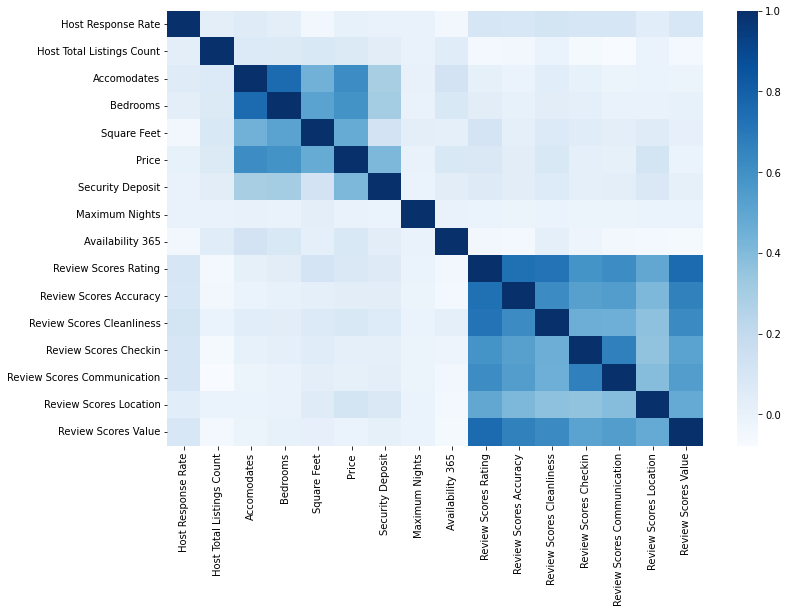

In [ ]:
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[relevant_col].corr(), cmap="Blues")
plt.show()

In [ ]:
df.columns

Index(['Listing ID', 'Last Scraped', 'Host ID', 'Host Name', 'Host Since',
       'Host Location', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Neighborhood', 'Host Listings Count',
       'Host Total Listings Count', 'Street', 'Neighborhood',
       'Neighborhood Cleansed', 'Neighborhood Group Cleansed', 'City', 'State',
       'Zipcode', 'Market', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last scraped',
       'Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'R

In [ ]:
df[df['Square Feet'] == df['Square Feet'].max()]

,Listing ID,Last Scraped,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighborhood,Host Listings Count,Host Total Listings Count,Street,Neighborhood,Neighborhood Cleansed,Neighborhood Group Cleansed,City,State,Zipcode,Market,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per month,Geolocation,Sentiment
27769,860941,5/3/17,4324567,Serena,12/4/12,"Los Angeles, California, United States",within an hour,100.0,NaN,Studio City,4.0,4.0,"Studio City, Studio City, CA 91604, United States",Studio City,Studio City,NaN,Studio City,CA,91604.0,Los Angeles,United States,34.146514,-118.398996,House,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",7000.0,109.0,699.0,NaN,200.0,60.0,1,0,2,365,a week ago,NaN,0,16,24,269,5/3/17,188,1/29/13,4/21/17,96.0,9.0,10.0,10.0,10.0,10.0,10.0,strict,4.0,3.62,"34.1465137439,-118.398995936",2.0


In [ ]:
df.groupby('State_')['Price'].mean().sort_values(ascending = False)

State_
Texas                   201.471455
Tennessee               182.965263
Maryland                182.333333
Louisiana               171.744630
Massachusetts           161.272171
California              150.678553
District of Columbia    150.650242
New York                136.589543
Washington              130.825290
Illinois                126.651980
Colorado                124.653295
Oregon                  109.291506
Name: Price, dtype: float64

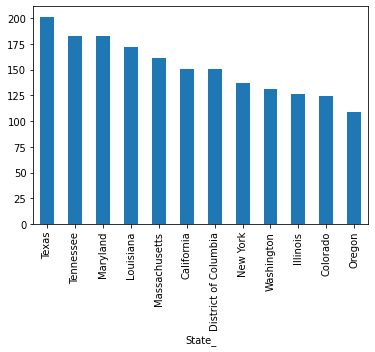

In [ ]:
df.groupby('State_')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar')

Text(0, 0.5, 'Numbers of Record')

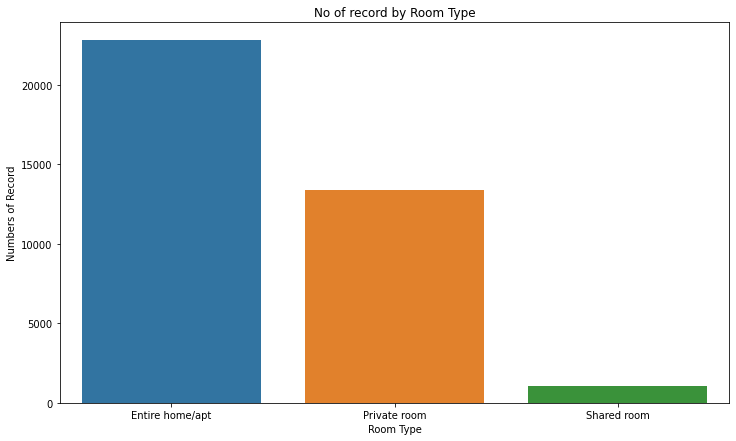

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x="Room Type",data=df)
plt.title("No of record by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Numbers of Record")

In [ ]:
d = df["State"].value_counts()
d.keys().tolist()
# d.values
d

CA    13322
NY    11642
TX     2229
DC     2082
LA     1687
IL     1570
OR     1037
WA     1036
MA      983
TN      955
CO      699
MD        9
Name: State, dtype: int64

In [ ]:
states = {
    'CA': 'California',
    'TN': 'Tennessee',
    'LA': 'Louisiana',
    'TX': 'Texas',
    'MA': 'Massachusetts',
    'IL': 'Illinois',
    'CO': 'Colorado',
    'NY': 'New York',
    'OR': 'Oregon',
    'DC': 'District of Columbia',
    'WA': 'Washington',
    'MD': 'Maryland',
}

df["State_"] = df["State"].map(states)
# df["State_"]

1        California
4        California
5        California
6        California
7        California
            ...    
51164    California
51166    California
51167    California
51168    California
51169    California
Name: State_, Length: 37251, dtype: object

In [ ]:
#df.info()

In [ ]:
## has 100% null values
df.drop("Host Acceptance Rate", axis=1, inplace=True)

In [ ]:
df["Last Scraped"] = (pd.datetime.today() - pd.to_datetime(df["Last Scraped"])).dt.days
df["Host Since"] = (pd.datetime.today() - pd.to_datetime(df["Host Since"])).dt.days

df["First Review"] = (pd.datetime.today() - pd.to_datetime(df["First Review"])).dt.days
df["Last Review"] = (pd.datetime.today() - pd.to_datetime(df["Last Review"])).dt.days
df["Calendar last scraped"] = (pd.datetime.today() - pd.to_datetime(df["Calendar last scraped"])).dt.days

In [ ]:
df["Amen_Count"] = df["Amenities"].apply(lambda x: len(str(x).split(",")))
df.drop("Amenities", axis=1, inplace=True)

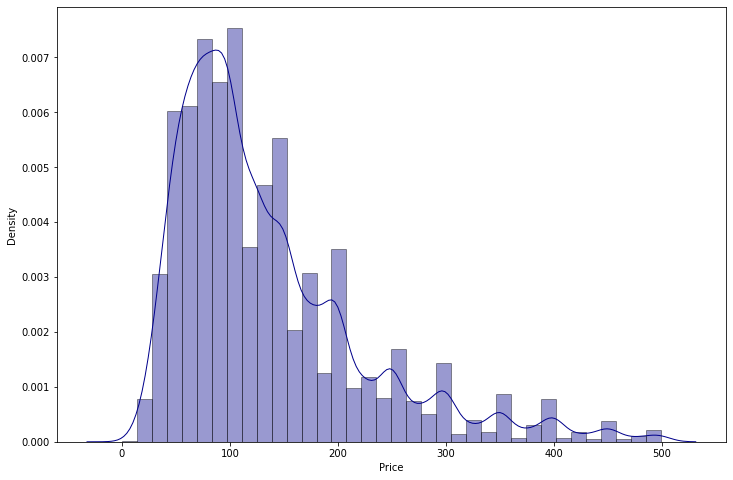

In [ ]:
# Filter the Price to below 500
PriceFilteredData = df[df['Price'] < 500]
plt.figure(figsize=(12, 8))
# Density Plot and Histogram of variable "Price"
sns.distplot(PriceFilteredData['Price'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

In [ ]:
df["State"].value_counts()

CA    13322
NY    11642
TX     2229
DC     2082
LA     1687
IL     1570
OR     1037
WA     1036
MA      983
TN      955
CO      699
MD        9
Name: State, dtype: int64

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

fig = px.choropleth(locations=d.keys().tolist(), locationmode="USA-states", color=d.values, scope="usa",)
fig.show()

In [ ]:
df["Count"] = df["State"].map(df["State"].value_counts())
# df["Count"]

In [ ]:
# Create a Scattergeo trace with the `lat` and `lon` columns as the coordinates, and the `AirBnB Listing` column as the value
fig = px.scatter_geo(df, lat="Latitude", lon="Longitude", color="Count" , title="AirBnB Listing")

# Update the layout to include a color bar and title
fig.update_layout(coloraxis_colorbar=dict(title="AirBnB Listing"),
                  title_text="Heatmap of AirBnB Listing by US States")

# Show the plot
fig.show()


In [ ]:
df.describe()

,Listing ID,Last Scraped,Host ID,Host Since,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per month,Sentiment,Amen_Count,Count
count,3.725100e+04,37251.000000,3.725100e+04,37162.000000,31320.000000,37162.000000,37162.000000,37251.000000,37251.000000,37230.000000,37147.000000,37207.000000,37218.000000,567.000000,37012.000000,6593.000000,8096.000000,16517.000000,28579.000000,37251.000000,37251.000000,37251.000000,3.725100e+04,37251.000000,37251.000000,37251.000000,37251.000000,37251.000000,37251.000000,37251.000000,37249.000000,37250.000000,37226.000000,37225.000000,37231.000000,37242.000000,37251.000000,37238.000000,37250.000000,37250.000000,37242.000000,37251.000000,37251.000000
mean,9.579743e+06,2119.755443,3.116034e+07,3110.636645,94.767784,5.957591,5.957591,37.648651,-96.540643,3.451840,1.278717,1.343968,1.840588,930.943563,148.088161,580.403610,3173.759511,273.448689,67.339830,1.740302,13.316260,3.194626,1.166767e+05,10.365252,24.409922,40.840326,175.401815,2119.980296,23.076159,2598.137875,2238.513651,94.111517,9.611884,9.390678,9.770138,9.779496,9.540469,9.447204,3.025638,1.712773,1.982654,17.112373,8916.312126
std,5.327427e+06,127.247489,3.115337e+07,618.624152,14.503301,39.579468,39.579468,4.362009,20.679657,2.313134,0.637694,0.924441,1.393285,911.385580,122.207101,202.303169,2944.463141,165.873300,55.714557,1.452715,22.052042,11.435969,1.573546e+07,10.533116,21.459610,32.597132,138.534907,127.322946,35.995559,442.125782,217.472078,8.011835,0.800713,1.009350,0.641246,0.632770,0.791528,0.859426,7.382979,2.200543,0.158941,5.552951,5217.228765
min,5.900000e+02,2033.000000,4.600000e+01,2047.000000,0.000000,0.000000,0.000000,29.898266,-122.777344,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,70.000000,301.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,2033.000000,1.000000,2035.000000,2034.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000,0.000000,1.000000,9.000000
25%,5.051476e+06,2062.000000,6.033312e+06,2624.000000,100.000000,1.000000,1.000000,34.055599,-118.350462,2.000000,1.000000,1.000000,1.000000,300.000000,75.000000,420.000000,1600.000000,150.000000,26.000000,1.000000,0.000000,1.000000,3.000000e+01,0.000000,1.000000,5.000000,33.000000,2062.000000,3.000000,2284.000000,2079.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.370000,2.000000,13.000000,2082.000000
50%,9.713884e+06,2063.000000,2.089221e+07,3030.500000,100.000000,1.000000,1.000000,38.897877,-90.102697,2.000000,1.000000,1.000000,1.000000,750.000000,110.000000,575.000000,2500.000000,250.000000,50.000000,1.000000,0.000000,2.000000,1.125000e+03,7.000000,21.000000,40.000000,162.000000,2063.000000,9.000000,2480.000000,2137.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,2.000000,17.000000,11642.000000
75%,1.431984e+07,2094.000000,4.688216e+07,3532.000000,100.000000,2.000000,2.000000,40.738025,-73.982085,4.000000,1.000000,2.000000,2.000000,1200.000000,179.000000,750.000000,3750.000000,400.000000,90.000000,2.000000,20.000000,3.000000,1.125000e+03,19.000000,44.000000,71.000000,321.000000,2094.000000,27.000000,2772.000000,2339.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.460000,2.000000,21.000000,13322.000000
max,1.882516e+07,2628.000000,1.310274e+08,5411.000000,100.000000,1026.000000,1026.000000,47.733316,-71.000261

In [ ]:
df.corr()

,Listing ID,Last Scraped,Host ID,Host Since,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per month,Sentiment,Amen_Count,Count
Listing ID,1.000000,-0.229615,0.586351,-0.541933,0.018735,0.016241,0.016241,-0.062883,0.054620,-0.023842,-0.023896,-0.056314,-0.024886,-0.202750,-0.103634,-0.134431,-0.071280,-0.088775,-0.123553,-0.069422,-0.079059,-0.057150,-0.008570,0.008334,0.012940,0.018597,-0.166932,-0.229585,-0.374956,-0.866146,-0.387486,0.011458,0.009407,0.019591,-0.016897,-0.028826,0.038361,0.059588,0.010185,0.157193,-0.054553,0.138386,0.023871
Last Scraped,-0.229615,1.000000,-0.132686,0.079938,0.018909,0.029009,0.029009,0.167975,-0.282217,0.067755,0.053515,0.065074,0.046036,0.024973,0.021217,0.022182,-0.033499,-0.012280,0.034119,0.014875,-0.039968,-0.027140,-0.001615,0.042504,0.055409,0.066521,0.137177,0.999995,-0.011750,0.195493,0.506143,0.023226,0.012598,0.051753,0.015851,0.018961,0.018737,0.007420,0.053462,0.041304,0.020386,-0.096486,-0.261749
Host ID,0.586351,-0.132686,1.000000,-0.856171,0.006067,-0.013215,-0.013215,-0.060257,0.030503,0.000584,0.007762,-0.018703,0.014723,-0.185737,-0.068572,-0.120820,-0.049318,-0.087142,-0.069720,-0.025149,-0.042940,-0.046233,-0.004897,0.065659,0.070230,0.074325,-0.038510,-0.132660,-0.199431,-0.497627,-0.240009,-0.053150,-0.049259,-0.031006,-0.045020,-0.063663,-0.021561,-0.007613,-0.016069,0.134110,-0.047805,0.084781,0.019494
Host Since,-0.541933,0.079938,-0.856171,1.000000,-0.002863,-0.013372,-0.013372,0.064039,-0.016849,-0.001390,-0.005364,0.021376,-0.011551,0.105530,0.066587,0.101002,0.034127,0.097305,0.074734,0.034190,0.050698,0.048078,0.004753,-0.051102,-0.052331,-0.053687,0.045499,0.079888,0.213100,0.543481,0.189308,0.049682,0.035689,0.027250,0.038939,0.052300,0.011181,0.000629,0.005767,-0.122345,0.039692,-0.081938,0.006758
Host Response Rate,0.018735,0.018909,0.006067,-0.002863,1.000000,0.028972,0.028972,-0.052234,-0.063267,0.054999,0.028611,0.034588,0.053550,-0.039621,0.008075,0.050334,-0.003367,0.001336,0.007537,0.055623,0.012702,-0.021204,0.002038,-0.071423,-0.063374,-0.059170,-0.040001,0.018947,0.105638,-0.008776,-0.122760,0.095849,0.093688,0.119837,0.097074,0.098948,0.041872,0.091730,0.043345,0.138111,0.043886,0.127752,-0.070771
Host Listings Count,0.016241,0.029009,-0.013215,-0.013372,0.028972,1.000000,1.000000,-0.035248,0.004209,0.073648,0.079897,0.066627,0.059012,0.083376,0.067563,-0.038402,0.093376,0.039496,0.109420,-0.034495,-0.047538,0.003161,-0.000921,0.079205,0.078066,0.075873,0.044970,0.029125,-0.036681,-0.026640,0.016894,-0.049671,-0.046783,-0.004658,-0.059479,-0.077077,-0.002511,-0.053863,0.629423,-0.032641,-0.009250,0.032317,-0.074310
Host Total Listings Count,0.016241,0.029009,-0.013215,-0.013372,0.028972,1.000000,1.000000,-0.035248,0.004209,0.073648,0.079897,0.066627,0.059012,0.083376,0.067563,-0.038402,0.093376,0.039496,0.109420,-0.034495,-0.047538,0.003161,-0.000921,0.079205,0.078066,0.075873,0.044970,0.029125,-0.036681,-0.026640,0.016894,-0.049671,-0.046783,-0.004658,-0.059479,-0.077077,-0.002511,-0.053863,0.629423,-0.032641,-0.009250,0.032317,-0.074310
Latitude,-0.062883,0.167975,-0.060257,0.064039,-0.052234,-0.035248,-0.035248,1.000000,0.389176,-0.153058,-0.143287,-0.130109,-0.139861,-0.142525,-0.102953,-0.008212,-0.069652,-0.041339,-0.121259,-0.100056,-0.028168,0.017613,-0.003538,-0.157967,-0.154170,-0.149418,-0.098365,0.167348,-0.000444,0.056424,0.113811,-0.054720,-0.031072,-0.051345,-0.033739,-0.014965,-0.033428,-0.044192,-0.0

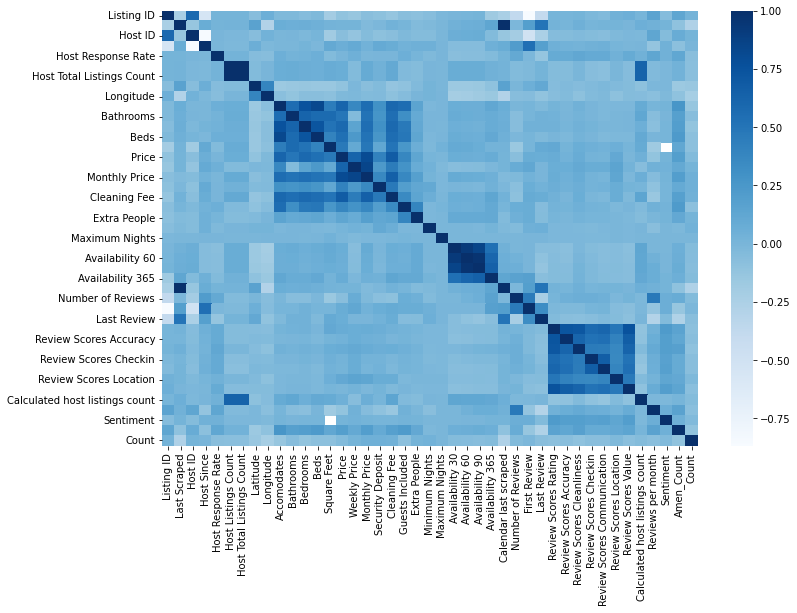

In [ ]:
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="Blues")
plt.show()

In [ ]:
df.columns

Index(['Listing ID', 'Last Scraped', 'Host ID', 'Host Name', 'Host Since',
       'Host Location', 'Host Response Time', 'Host Response Rate',
       'Host Neighborhood', 'Host Listings Count', 'Host Total Listings Count',
       'Street', 'Neighborhood', 'Neighborhood Cleansed',
       'Neighborhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Square Feet', 'Price', 'Weekly Price', 'Monthly Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last scraped',
       'Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Sc

In [ ]:
df.isnull().sum()

Listing ID                            0
Last Scraped                          0
Host ID                               0
Host Name                            89
Host Since                           89
Host Location                       205
Host Response Time                 5931
Host Response Rate                 5931
Host Neighborhood                  6185
Host Listings Count                  89
Host Total Listings Count            89
Street                                0
Neighborhood                       7548
Neighborhood Cleansed                 0
Neighborhood Group Cleansed       24573
City                                 16
State                                 0
Zipcode                             446
Market                              162
Country                               0
Latitude                              0
Longitude                             0
Property Type                         1
Room Type                             0
Accomodates                          21


In [ ]:
# Calculate the percentage of null values
null_percent = df.isnull().mean().round(4) * 100

In [ ]:
high_null_columns = null_percent.loc[null_percent > 50]
high_null_columns = high_null_columns.keys().tolist()
high_null_columns

['Neighborhood Group Cleansed',
 'Square Feet',
 'Weekly Price',
 'Monthly Price',
 'Security Deposit',
 'Has Availability']

In [ ]:
null_columns = null_percent.loc[null_percent > 1].keys().tolist()
null_columns

['Host Response Time',
 'Host Response Rate',
 'Host Neighborhood',
 'Neighborhood',
 'Neighborhood Group Cleansed',
 'Zipcode',
 'Square Feet',
 'Weekly Price',
 'Monthly Price',
 'Security Deposit',
 'Cleaning Fee',
 'Has Availability']

In [ ]:
obj_col = [i for i in df.columns if df[i].dtype == "object"]
obj_col

['Host Name',
 'Host Location',
 'Host Response Time',
 'Host Neighborhood',
 'Street',
 'Neighborhood',
 'Neighborhood Cleansed',
 'Neighborhood Group Cleansed',
 'City',
 'State',
 'Zipcode',
 'Market',
 'Country',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Calendar Updated',
 'Has Availability',
 'Cancellation Policy',
 'Geolocation']

In [ ]:
df[obj_col].nunique()

Host Name                       9462
Host Location                   1142
Host Response Time                 4
Host Neighborhood               1106
Street                          7430
Neighborhood                    1002
Neighborhood Cleansed           1078
Neighborhood Group Cleansed       22
City                             402
State                             12
Zipcode                         1549
Market                            37
Country                            1
Property Type                     33
Room Type                          3
Bed Type                           5
Calendar Updated                  56
Has Availability                   1
Cancellation Policy                6
Geolocation                    37250
dtype: int64

In [ ]:
df.head()

,Listing ID,Last Scraped,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighborhood,Host Listings Count,Host Total Listings Count,Street,Neighborhood,Neighborhood Cleansed,Neighborhood Group Cleansed,City,State,Zipcode,Market,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per month,Geolocation,Sentiment,Amen_Count
1,8384432,2062,506809,Ky,4274.0,"Los Angeles, California, United States",within a few hours,100.0,Woodland Hills/Warner Center,2.0,2.0,"Woodland Hills/Warner Center, Woodland Hills, ...",Woodland Hills/Warner Center,Woodland Hills,NaN,Woodland Hills,CA,91364,Los Angeles,United States,34.148594,-118.596684,Other,Entire home/apt,2.0,1.5,1.0,1.0,Real Bed,NaN,175.0,NaN,NaN,500.0,100.0,1,0,2,5,2 weeks ago,NaN,12,42,72,72,2062,2,2427,2287.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,2.0,0.16,"34.1485944277,-118.596683716",2.0,20
4,9154029,2062,24663738,Angelita (AKA) LIA,2938.0,"Los Angeles, California, United States",within a few hours,100.0,Justicia,3.0,3.0,"West Hollywood, CA, United States",West Hollywood,West Hollywood,NaN,West Hollywood,CA,NaN,Los Angeles,United States,34.089742,-118.386142,Apartment,Private room,1.0,1.0,1.0,1.0,Real Bed,NaN,94.0,560.0,1900.0,NaN,NaN,1,0,5,30,6 weeks ago,NaN,15,45,75,350,2062,2,2573,2518.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.0,0.12,"34.0897418683,-118.386142001",2.0,22
5,16663488,2062,103027984,Sunny,2238.0,US,within an hour,88.0,Mid-Wilshire,8.0,8.0,"West Hollywood, West Hollywood, CA 90048, Unit...",West Hollywood,West Hollywood,NaN,West Hollywood,CA,90048,Los Angeles,United States,34.081999,-118.371062,Apartment,Entire home/apt,9.0,2.0,3.0,5.0,Real Bed,NaN,250.0,NaN,NaN,500.0,190.0,5,20,2,1125,2 weeks ago,NaN,27,54,84,173,2062,6,2150,2079.0,60.0,7.0,6.0,7.0,7.0,9.0,7.0,strict,5.0,2.02,"34.0819989766,-118.371061829",2.0,19
6,10090432,2062,2331850,Dan,3882.0,"Los Angeles, California, United States",within an hour,100.0,West Hollywood,10.0,10.0,"West Hollywood, Los Angeles, CA 90028, United ...",West Hollywood,West Hollywood,NaN,Los Angeles,CA,90028,Los Angeles,United States,34.091468,-118.343891,Apartment,Entire home/apt,7.0,2.0,2.0,4.0,Real Bed,NaN,155.0,NaN,NaN,NaN,69.0,4,13,1,1125,today,NaN,15,25,51,138,2062,92,2555,2074.0,91.0,10.0,10.0,9.0,9.0,10.0,9.0,strict,6.0,5.59,"34.0914681471,-118.343890871",2.0,22
7,4322990,2062,22444895,Said,2996.0,"Los Angeles, California, United States",NaN,NaN,West Hollywood,1.0,1.0,"West Hollywood, West Hollywood, CA 90048, Unit...",West Hollywood,West Hollywood,NaN,West Hollywood,CA,90048,Los Angeles,United States,34.080434,-118.370778,Apartment,Entire home/apt,4.0,1.5,1.0,2.0,Real Bed,NaN,135.0,775.0,2400.0,100.0,40.0,2,10,2,60,3 weeks ago,NaN,0,0,0,122,2062,33,2603,2181.0,95.0,10.0,9.0,10.0,10.0,10.0,10.0,flexible,1.0,1.83,"34.0804337671,-118.370777575",2.0,18


In [ ]:
# df["State"].fillna(df["State"].mode())
# df["Street"].dtype == "object"

In [ ]:
c = ["Host Name", "Geolocation", "Street", "Host Location"]

In [ ]:
df.drop(high_null_columns+c, axis=1, inplace=True)

In [ ]:
df.dtypes

Listing ID                          int64
Last Scraped                        int64
Host ID                             int64
Host Since                        float64
Host Response Time                 object
Host Response Rate                float64
Host Neighborhood                  object
Host Listings Count               float64
Host Total Listings Count         float64
Neighborhood                       object
Neighborhood Cleansed              object
City                               object
State                              object
Zipcode                            object
Market                             object
Country                            object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accomodates                       float64
Bathrooms                         float64
Bedrooms                          float64
Beds                              

In [ ]:
df = df.apply(lambda x: x.astype("category").cat.codes if x.dtype == "object" else x )
df.head(2)

,Listing ID,Last Scraped,Host ID,Host Since,Host Response Time,Host Response Rate,Host Neighborhood,Host Listings Count,Host Total Listings Count,Neighborhood,Neighborhood Cleansed,City,State,Zipcode,Market,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per month,Sentiment,Amen_Count
1,8384432,2062,506809,4274.0,2,100.0,1089,2.0,2.0,991,1071,356,0,1331,15,0,34.148594,-118.596684,23,0,2.0,1.5,1.0,1.0,4,175.0,100.0,1,0,2,5,13,12,42,72,72,2062,2,2427,2287.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3,2.0,0.16,2.0,20
4,9154029,2062,24663738,2938.0,2,100.0,483,3.0,3.0,955,1036,344,0,-1,15,0,34.089742,-118.386142,0,1,1.0,1.0,1.0,1.0,4,94.0,NaN,1,0,5,30,46,15,45,75,350,2062,2,2573,2518.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3,1.0,0.12,2.0,22


In [ ]:
df["State"].mode().values[0]

0

In [ ]:
#df = df.apply(lambda x: x.fillna(x.mode()) if x.isna().sum() != 0 else x)
df = df.apply(lambda x: x.replace(np.NaN, x.mode().values[0]) if x.isna().sum() != 0 else x)

In [ ]:
df.isnull().sum()

Listing ID                        0
Last Scraped                      0
Host ID                           0
Host Since                        0
Host Response Time                0
Host Response Rate                0
Host Neighborhood                 0
Host Listings Count               0
Host Total Listings Count         0
Neighborhood                      0
Neighborhood Cleansed             0
City                              0
State                             0
Zipcode                           0
Market                            0
Country                           0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accomodates                       0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Price                             0
Cleaning Fee                      0
Guests Included             

In [ ]:
df.head()

,Listing ID,Last Scraped,Host ID,Host Since,Host Response Time,Host Response Rate,Host Neighborhood,Host Listings Count,Host Total Listings Count,Neighborhood,Neighborhood Cleansed,City,State,Zipcode,Market,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per month,Sentiment,Amen_Count
1,8384432,2062,506809,4274.0,2,100.0,1089,2.0,2.0,991,1071,356,0,1331,15,0,34.148594,-118.596684,23,0,2.0,1.5,1.0,1.0,4,175.0,100.0,1,0,2,5,13,12,42,72,72,2062,2,2427,2287.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3,2.0,0.16,2.0,20
4,9154029,2062,24663738,2938.0,2,100.0,483,3.0,3.0,955,1036,344,0,-1,15,0,34.089742,-118.386142,0,1,1.0,1.0,1.0,1.0,4,94.0,50.0,1,0,5,30,46,15,45,75,350,2062,2,2573,2518.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3,1.0,0.12,2.0,22
5,16663488,2062,103027984,2238.0,3,88.0,609,8.0,8.0,955,1036,344,0,1185,15,0,34.081999,-118.371062,0,0,9.0,2.0,3.0,5.0,4,250.0,190.0,5,20,2,1125,13,27,54,84,173,2062,6,2150,2079.0,60.0,7.0,6.0,7.0,7.0,9.0,7.0,3,5.0,2.02,2.0,19
6,10090432,2062,2331850,3882.0,3,100.0,1053,10.0,10.0,955,1036,178,0,1167,15,0,34.091468,-118.343891,0,0,7.0,2.0,2.0,4.0,4,155.0,69.0,4,13,1,1125,54,15,25,51,138,2062,92,2555,2074.0,91.0,10.0,10.0,9.0,9.0,10.0,9.0,3,6.0,5.59,2.0,22
7,4322990,2062,22444895,2996.0,-1,100.0,1053,1.0,1.0,955,1036,344,0,1185,15,0,34.080434,-118.370778,0,0,4.0,1.5,1.0,2.0,4,135.0,40.0,2,10,2,60,26,0,0,0,122,2062,33,2603,2181.0,95.0,10.0,9.0,10.0,10.0,10.0,10.0,0,1.0,1.83,2.0,18


In [ ]:
X = df.drop(["Listing ID", "Host ID", "Latitude", "Longitude", "Country", "Review Scores Location"], axis=1)
y = df["Review Scores Location"]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the feature
scaler.fit(X)

# Transform the feature
X = scaler.transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp
from hyperopt import STATUS_OK
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the hyperparameter search space
space = hp.choice('classifier_type', [
    {
        'type': 'xgb',
        'max_depth': hp.quniform('max_depth', 2, 10, 1),
        'subsample': hp.uniform('subsample', 0.5, 1),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.1))
    },
])

space1 = hp.choice('classifier_type', [
{
        'type': 'random_forest',
        'n_estimators': hp.quniform('n_estimators', 100, 500, 1),
        'max_depth_rf': hp.quniform('max_depth_rf', 2, 10, 1)
    },
])

In [ ]:
# Define the objective function to optimize
def objective(params):

    if params['type'] == 'xgb':
        model = xgb.XGBRegressor(max_depth=int(params['max_depth']),
                                 subsample=params['subsample'],
                                 colsample_bytree=params['colsample_bytree'],
                                 learning_rate=params['learning_rate'])
    elif params['type'] == 'random_forest':
        model = RandomForestRegressor(n_estimators=int(params['n_estimators']),
                                      max_depth=int(params['max_depth_rf']))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {'loss': rmse, 'status': STATUS_OK}

In [ ]:
from hyperopt import Trials

# Create a Trials object to store the results of the optimization process
trials = Trials()

# Run the optimization
best = fmin(objective, space, algo=tpe.suggest, max_evals=10, trials=trials)
best

[23:14:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:14:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:14:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:14:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 10/10 [06:47<00:00, 40.80s/it, best loss: 0.609625442580676]


{'classifier_type': 0,
 'colsample_bytree': 0.5424805659227968,
 'learning_rate': 0.08189418198526549,
 'max_depth': 7.0,
 'subsample': 0.6385775767200069}

In [ ]:
# Access the results of the trials
results = trials.results
results

[{'loss': 0.6550243581713101, 'status': 'ok'},
 {'loss': 0.767877238718804, 'status': 'ok'},
 {'loss': 0.609625442580676, 'status': 'ok'},
 {'loss': 0.7785689321455856, 'status': 'ok'},
 {'loss': 0.663850893148223, 'status': 'ok'},
 {'loss': 0.632973527151163, 'status': 'ok'},
 {'loss': 0.631366406663329, 'status': 'ok'},
 {'loss': 0.6335386977809352, 'status': 'ok'},
 {'loss': 0.6442325731487318, 'status': 'ok'},
 {'loss': 0.6368797116913791, 'status': 'ok'}]

In [ ]:
# Create a Trials object to store the results of the optimization process
trials = Trials()

# Run the optimization
best1 = fmin(objective, space1, algo=tpe.suggest, max_evals=10, trials=trials)
best1

100%|██████████| 10/10 [06:49<00:00, 40.99s/it, best loss: 0.6359179370956879]


{'classifier_type': 0, 'max_depth_rf': 8.0, 'n_estimators': 249.0}

In [ ]:
results = trials.results
results

[{'loss': 0.6491614653375636, 'status': 'ok'},
 {'loss': 0.644481032682665, 'status': 'ok'},
 {'loss': 0.6803006281578033, 'status': 'ok'},
 {'loss': 0.6359179370956879, 'status': 'ok'},
 {'loss': 0.663719259893079, 'status': 'ok'},
 {'loss': 0.6443659229224672, 'status': 'ok'},
 {'loss': 0.6405637183471017, 'status': 'ok'},
 {'loss': 0.6817093128563281, 'status': 'ok'},
 {'loss': 0.6493829308704868, 'status': 'ok'},
 {'loss': 0.6440367102123912, 'status': 'ok'}]

In [ ]:
# Get the best set of hyperparameters from the optimization process
best_hyperparameters = best
best_hyperparameters1 = best1

# Extract the relevant hyperparameters from the best set of hyperparameters
max_depth = int(best_hyperparameters['max_depth'])
subsample = best_hyperparameters['subsample']
colsample_bytree = best_hyperparameters['colsample_bytree']
learning_rate = best_hyperparameters['learning_rate']

# Create an XGBoost model with the best hyperparameters
xgb = xgb.XGBRegressor(max_depth=max_depth,
                          subsample=subsample,
                          colsample_bytree=colsample_bytree,
                          learning_rate=learning_rate)

In [ ]:
# Train the model on the training set
xgb.fit(X_train, y_train)

# Validate the model on the validation set
y_pred = xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

[23:49:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse

0.609625442580676

In [ ]:
xgb.score(X_train, y_train)

0.6058556981484027

In [ ]:
model = LinearRegression()

In [ ]:
# Train the model on the training set
model.fit(X_train, y_train)

# Validate the model on the validation set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
rmse

0.6465333497620184

In [ ]:
model.score(X_train, y_train)

0.3044338967766068

In [ ]:
# Extract the relevant hyperparameters from the best set of hyperparameters
n_estimators = int(best_hyperparameters1['n_estimators'])
max_depth = int(best_hyperparameters1['max_depth_rf'])

# Create a random forest model with the best hyperparameters
rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)

In [ ]:
# Train the model on the training set
rf.fit(X_train, y_train)

# Validate the model on the validation set
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
rmse

0.635478773139004

Text(0, 0.5, 'Error')

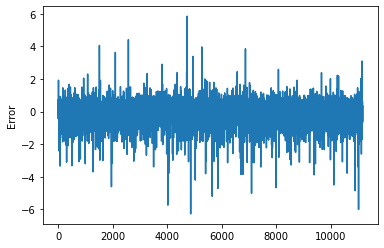

In [ ]:
# Plot the predicted vs. actual values
plt.plot(range(len(y_test)), (y_test- y_pred))
plt.ylabel('Error')

In [ ]:
rf.score(X_train, y_train)

0.4651999647341337